In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import LinearConstraint
from scipy.stats import skew
from scipy.stats import skewtest

In [2]:
# The contraining term written as a function
def f_comp(x,y,a,b,c,d,e,f,g,h):
    
    value=.5*(a*x*y+b*x/y+c*y/x+d/(x*y))+e*x+f/x+g*y+h/y
    return value

In [17]:
# generate distribution of minimizing x and y values for randomly generated coefficients

# initialize empty arrays for x_min and y_min distributions
x_min=[]
y_min=[]
def f_simp(v, args):
    a, b, c, d ,e, f, g, h = args
    return f_comp(v[0],v[1],a,b,c,d,e,f,g,h)



for x in range(2000):
#     generator new random numbers with constraint
    a=random.uniform(0, 10)
    b=random.uniform(0, 10)
    c=random.uniform(0, 10)
    d=random.uniform(0, 10)
    e=random.uniform(0, np.sqrt(a*b))
    f=random.uniform(0, np.sqrt(c*d))
    g=random.uniform(0, np.sqrt(a*c))
    h=random.uniform(0, np.sqrt(b*d))
    
#     Define new function with these random values
#     def f_simp(v):
#         value=f_comp(v[0],v[1],a,b,c,d,e,f,g,h)
#         return value
#     minimize the function of with random values using a guess of x,y=1,1
    min_val=opt.minimize(lambda x: f_simp(x, (a, b, c, d,e,f,g,h)),(1,1),bounds=((.00001,np.inf),(.00001,np.inf)))
# #     record values
    x_min.append(min_val.x[0])
    y_min.append(min_val.x[1])
    
    

Text(0.5, 1.0, 'Scatter of x_min,y_min for Random 0<C_{ijkl}<10')

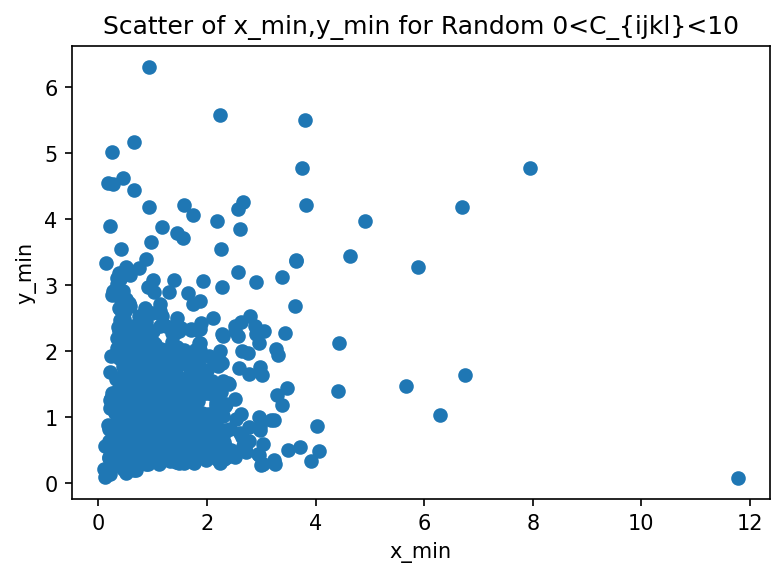

In [8]:
# plot the minimizing (x,y)
plt.rcParams['figure.dpi'] = 150
plt.scatter(x_min,y_min)
plt.xlabel('x_min')
plt.ylabel('y_min')
plt.title('Scatter of x_min,y_min for Random 0<C_{ijkl}<10')


Text(0.5, 1.0, 'Histogram of x_min')

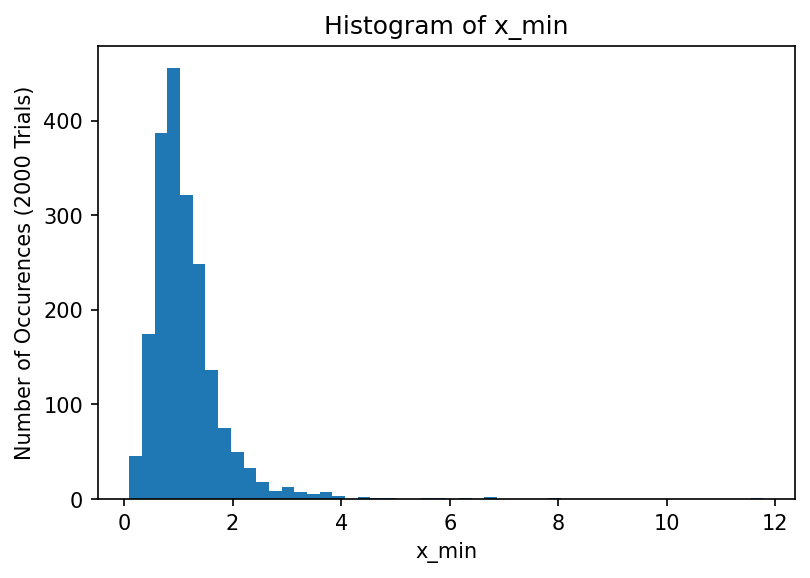

In [9]:
# plot distribution of minimzing x values
plt.rcParams['figure.dpi'] = 150
plt.hist(x_min,bins=50)
plt.xlabel('x_min')
plt.ylabel('Number of Occurences (2000 Trials)')
plt.title('Histogram of x_min')

Text(0.5, 1.0, 'Histogram of y_min')

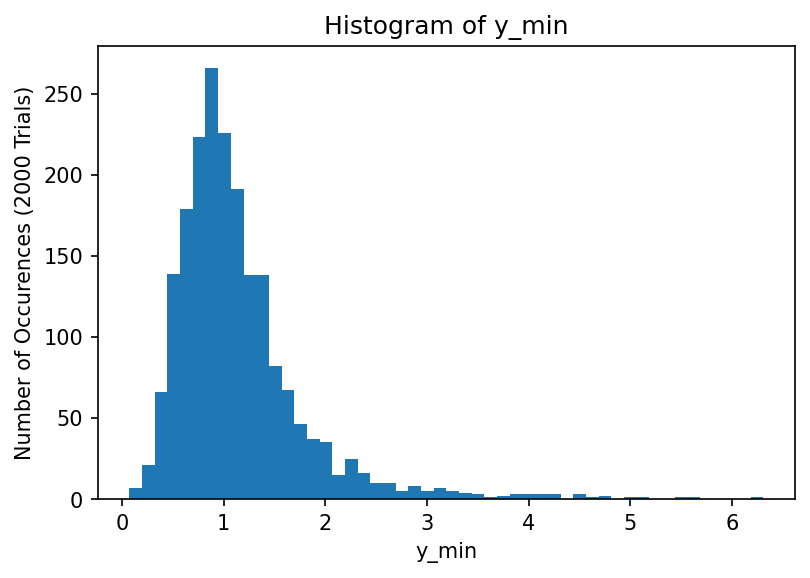

In [10]:
# plot distribution of minimzing y values
plt.rcParams['figure.dpi'] = 150
plt.hist(y_min,bins=50)
plt.xlabel('y_min')
plt.ylabel('Number of Occurences (2000 Trials)')
plt.title('Histogram of y_min')

(array([[1., 2., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.0992309 ,  0.21603422,  0.33283753,  0.44964085,  0.56644416,
         0.68324748,  0.8000508 ,  0.91685411,  1.03365743,  1.15046074,
         1.26726406,  1.38406738,  1.50087069,  1.61767401,  1.73447732,
         1.85128064,  1.96808396,  2.08488727,  2.20169059,  2.3184939 ,
         2.43529722,  2.55210054,  2.66890385,  2.78570717,  2.90251048,
         3.0193138 ,  3.13611712,  3.25292043,  3.36972375,  3.48652706,
         3.60333038,  3.7201337 ,  3.83693701,  3.95374033,  4.07054364,
         4.18734696,  4.30415028,  4.42095359,  4.53775691,  4.65456022,
         4.77136354,  4.88816686,  5.00497017,  5.12177349,  5.2385768 ,
         5.35538012,  5.47218344,  5.58898675,  5.70579007,  5.82259338,
         5.9393967 , 

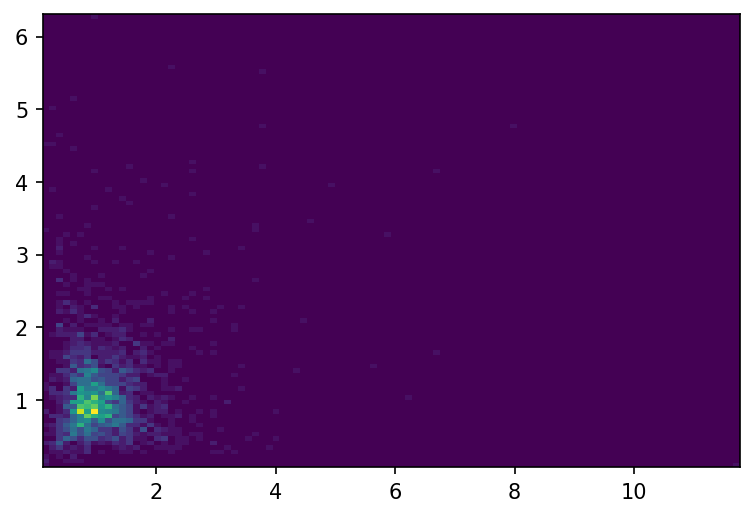

In [11]:
# make a heat map of the minimzing (x,y)
plt.hist2d(x_min,y_min,bins=100)

In [12]:
# get arrays of (x,y) values where both are under 4
n=0
x_small=np.array([])
y_small=np.array([])
for n in range(0,len(x_min)):
    if x_min[n]<4 and y_min[n]<4:
        x_small=np.append(x_small,x_min[n])
        y_small=np.append(y_small,y_min[n])
        


Text(0.5, 1.0, 'Heat Map of x_min,y_min<4')

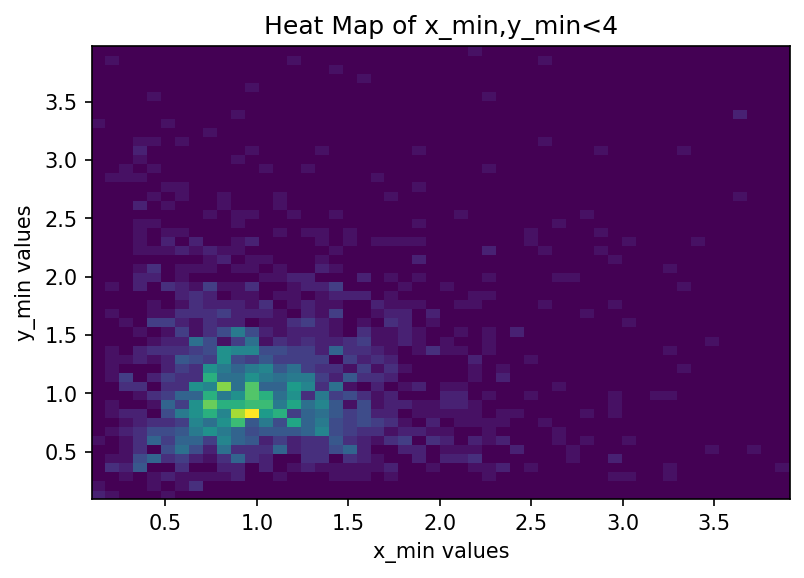

In [13]:
# create heat map of values of (x,y) less than 4
plt.hist2d(x_small,y_small,bins=50)
plt.xlabel('x_min values')
plt.ylabel('y_min values')
plt.title('Heat Map of x_min,y_min<4')

In [18]:
# check the skewness and mean of (x,y) for different upper bounds to check

# initialize empty arrays to record screwness and mean values
x_skew=np.array([])
x_mean=np.array([])
y_skew=np.array([])
y_mean=np.array([])
upper_bound=np.array([])
for n in range (1,21):
#     initialize empty arrays for the minimum values
    x_min=[]
    y_min=[]


    for x in range(2000):
#     generator new random numbers with constraint
        a=random.uniform(0, n)
        b=random.uniform(0, n)
        c=random.uniform(0, n)
        d=random.uniform(0, n)
        e=random.uniform(0, np.sqrt(a*b))
        f=random.uniform(0, np.sqrt(c*d))
        g=random.uniform(0, np.sqrt(a*c))
        h=random.uniform(0, np.sqrt(b*d))
    
#     Define new function with these random values
#     def f_simp(v):
#         value=f_comp(v[0],v[1],a,b,c,d,e,f,g,h)
#         return value
#     minimize the function of with random values using a guess of x,y=1,1
        min_val=opt.minimize(lambda x: f_simp(x, (a, b, c, d,e,f,g,h)),(1,1),bounds=((.00001,np.inf),(.00001,np.inf)))
# #     record values
        x_min.append(min_val.x[0])
        y_min.append(min_val.x[1])
#     recorded the skewness and mean of the x_min and y_min distributions for different n, along with recording n
    x_skew=np.append(x_skew,skew(x_min))
    x_mean=np.append(x_mean,np.mean(x_min))
    y_skew=np.append(y_skew,skew(y_min))
    y_mean=np.append(y_mean,np.mean(y_min))
    upper_bound=np.append(upper_bound,n)

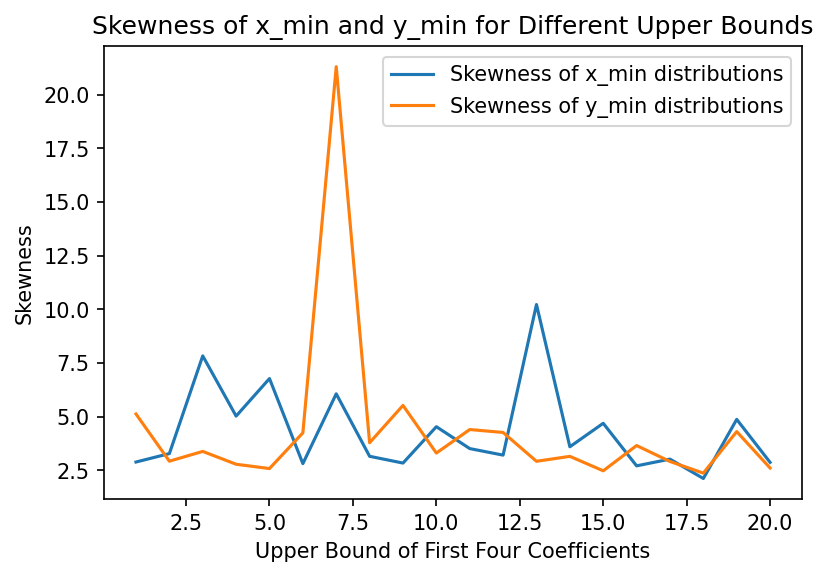

In [19]:
# plot the skewness of the x_min and y_min distributions for each upper bound
plt.plot(upper_bound,x_skew,label='Skewness of x_min distributions')
plt.plot(upper_bound,y_skew,label='Skewness of y_min distributions')
plt.xlabel('Upper Bound of First Four Coefficients')
plt.ylabel('Skewness')
plt.title('Skewness of x_min and y_min for Different Upper Bounds')
plt.legend()

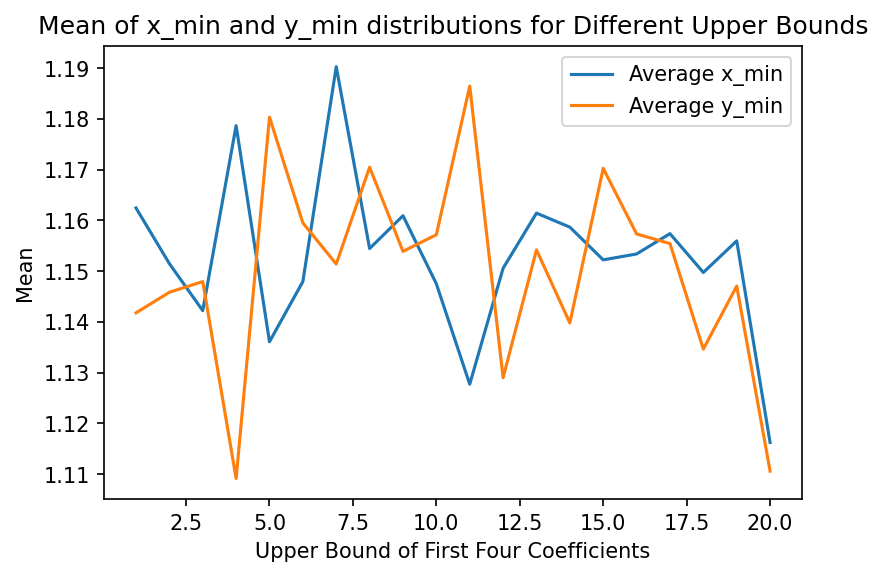

In [20]:
# plot the mean of the x_min and y_min distributions for each upper bound
plt.plot(upper_bound,x_mean,label='Average x_min')
plt.plot(upper_bound,y_mean,label='Average y_min')
plt.xlabel('Upper Bound of First Four Coefficients')
plt.ylabel('Mean')
plt.title('Mean of x_min and y_min distributions for Different Upper Bounds')
plt.legend()